In [2]:
import numpy as np
import matplotlib.pyplot as plt

## (a)

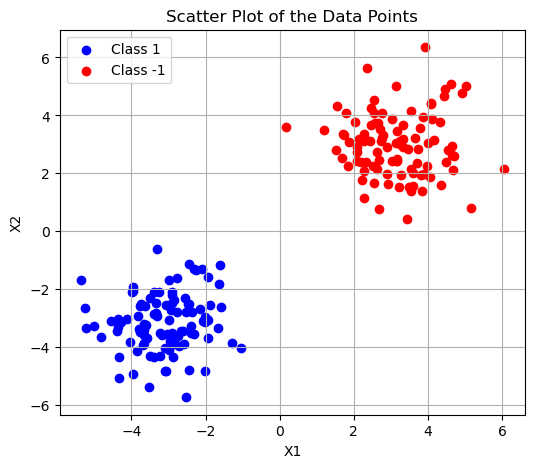

In [15]:
# Generating data
X = np.random.randn(200, 2)
X[:100] += np.array([-3, -3])
X[100:] += np.array([3, 3])
Y = np.ones(200)
Y[100:] = -1

# Scatter plot of the data points
plt.figure(figsize=(6, 5))
plt.scatter(X[:100, 0], X[:100, 1], color='blue', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], color='red', label='Class -1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Data Points')
plt.grid()
plt.legend()
plt.show()

## (b)

In [16]:
# Function to compute the gradient of the SVM loss
def svm_loss_gradient(w, X, Y):
    n = len(Y)
    gradient = w.copy()
    for i in range(n):
        if 1 - Y[i] * np.dot(X[i], w) > 0:
            gradient -= Y[i] * X[i]
    return gradient


## (c)

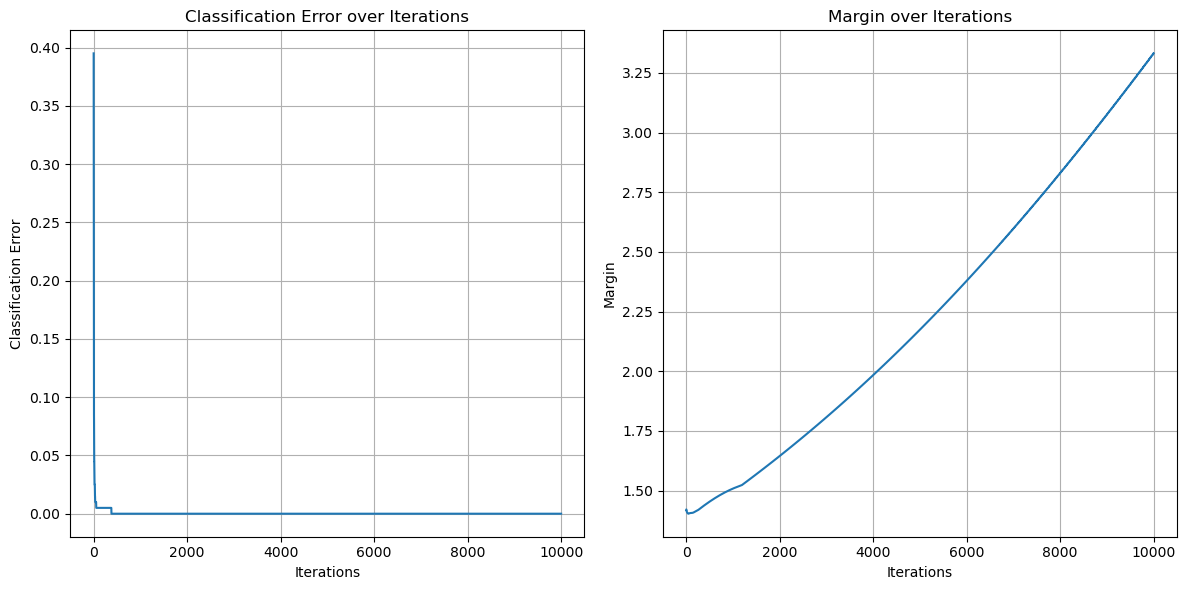

In [17]:
# Gradient descent function for SVM
def svm_gradient_descent(X, Y, w, mu, max_iter):
    margins = []
    classification_errors = []
    for _ in range(max_iter):
        gradient = svm_loss_gradient(w, X, Y)
        w -= mu * gradient

        margin = 2 / np.linalg.norm(w)
        margins.append(margin)

        predictions = np.sign(np.dot(X, w))
        classification_err = np.mean(predictions != Y)
        classification_errors.append(classification_err)

    return margins, classification_errors, w

# Parameters for gradient descent
mu = 1e-4
iterations = 10000  # Correcting the number of iterations to 1000 as mentioned in the task
w_initial = np.array([-1.0, 1.0])

# Running the gradient descent again with the corrected initial weights
margins, classification_errors, w_final = svm_gradient_descent(X, Y, w_initial, mu, iterations)

# Replotting the results
plt.figure(figsize=(12, 6))

# Plot for classification error
plt.subplot(1, 2, 1)
plt.plot(range(iterations), classification_errors)
plt.xlabel('Iterations')
plt.ylabel('Classification Error')
plt.title('Classification Error over Iterations')
plt.grid()

# Plot for margin
plt.subplot(1, 2, 2)
plt.plot(range(iterations), margins)
plt.xlabel('Iterations')
plt.ylabel('Margin')
plt.title('Margin over Iterations')
plt.grid()

plt.tight_layout()
plt.show()

## (d)

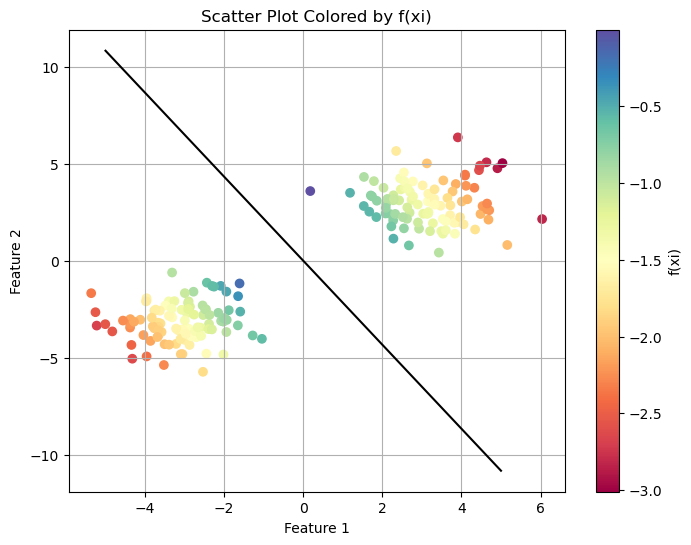

In [18]:
f_value = 1 - Y * np.dot(X, w_final)

# create scatter plot based on f(xi) value
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=f_value, cmap=plt.cm.Spectral)

# plot decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(w_final[0] * x1) / w_final[1]
plt.plot(x1, x2, 'k-')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot Colored by f(xi)')
plt.grid()
plt.colorbar(label='f(xi)')
plt.show()